In [1]:
# import the necessary libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import skimage.io as skio
import copy as cp

### Creating Training Data

In [2]:
# open the training data array 
tempfile = open('Variables/trainImagePatchArray.pckl', 'rb')
# load through the pickle library
trainImagePatchArray = pickle.load(tempfile)
tempfile.close()
# convert all values to integer
trainingDataIn= trainImagePatchArray.astype(int)

In [5]:
# open the output image obtained from the k-means++ clustering
tempfile = open('Variables/trainingOutputImage.pckl', 'rb')
# load the output image through the pickle library
trainingOutputImage = pickle.load(tempfile)
tempfile.close()
# taking the entire left half of the input image except the first pixel
trainingOutputImage = trainingOutputImage[1:300,1:224]
# reshaping the image
trainout = trainingOutputImage.reshape(((trainingOutputImage.shape[0]*trainingOutputImage.shape[1]),3))

In [93]:
trainout

array([[ 78, 102,  59],
       [ 78, 102,  59],
       [ 78, 102,  59],
       ...,
       [213, 203, 153],
       [213, 203, 153],
       [213, 203, 153]], dtype=uint8)

In [94]:
# open the file containing the centers of the clusters
tempfile = open('Variables/clusters.pckl', 'rb')
# load the clusters using pickle
clusters = pickle.load(tempfile)
tempfile.close()
# from the clusters dictionary, get the list of centers of the colors
colorlist = list(clusters.keys())
# and convert to a numpy array
colors = np.asarray(colorlist,dtype=int)

In [95]:
colors

array([[ 36,  82, 189],
       [ 17,  31,  12],
       [ 94, 151, 204],
       [ 78, 102,  59],
       [213, 203, 153]])

In [96]:
trainingDataIn

array([[ 88,  99,  90, ..., 139, 107,  95],
       [ 99,  90,  92, ..., 107,  95,  99],
       [ 90,  92,  82, ...,  95,  99,  91],
       ...,
       [203, 203, 202, ..., 204, 203, 202],
       [203, 202, 201, ..., 203, 202, 201],
       [202, 201, 201, ..., 202, 201, 204]])

In [97]:
# initialize an array of zeros with the length of trainout
trainingDataOut = np.zeros((len(trainout),5),dtype=int)
# for all pixels in the training image
for index,pixel in enumerate(trainout):
    # reassign the values to the array to 1 if the colors array is equal to the pixel's column 
    trainingDataOut[index,np.where((colors == pixel).all(axis=1))] = 1

In [98]:
trainingDataOut

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [99]:
# convert the training input data into a dataframe 
Trainingdataframe = pd.DataFrame(data=trainingDataIn,index=range(1,len(trainingDataIn)+1), columns= ["px"+str(i) for i in range(1,10)] )
# converting the training output data to a coordinate matrix, detailing the colors from the clusters
arr = sparse.coo_matrix(trainingDataOut)
# and adding that to the dataframe
Trainingdataframe['Color'] = arr.toarray().tolist()
Trainingdataframe

,px1,px2,px3,px4,px5,px6,px7,px8,px9,Color
1,88,99,90,110,114,93,139,107,95,"[0, 0, 0, 1, 0]"
2,99,90,92,114,93,85,107,95,99,"[0, 0, 0, 1, 0]"
3,90,92,82,93,85,85,95,99,91,"[0, 0, 0, 1, 0]"
4,92,82,80,85,85,93,99,91,114,"[0, 0, 0, 1, 0]"
5,82,80,91,85,93,100,91,114,118,"[0, 0, 0, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...
66673,203,203,203,204,204,203,204,204,204,"[0, 0, 0, 0, 1]"
66674,203,203,203,204,203,203,204,204,203,"[0, 0, 0, 0, 1]"
66675,203,203,202,203,203,202,204,203,202,"[0, 0, 0, 0, 1]"
66676,203,202,201,203,202,201,203,202,201,"[0, 0, 0, 0, 1]"


### Creating Testing Data. 

In [100]:
# open the test data from the pickle file
tempfile = open('Variables/testImagePatchArray.pckl', 'rb')
# loading it
testImagePatchArray = pickle.load(tempfile)
tempfile.close()
# converting it into integer data type
testDataX = testImagePatchArray.astype(int)
# load the expected test output image
tempfile = open('Variables/expectedtestingOutputImage.pckl', 'rb')
testOutputImage = pickle.load(tempfile)
tempfile.close()
# taking the entire test image except the first pixel
testOutputImage = testOutputImage[1:300,1:224]
# and reshaping it to incorporate the R, G, B channels
testout = testOutputImage.reshape(((testOutputImage.shape[0]*testOutputImage.shape[1]),3))
testDataX

array([[ 54,  55,  56, ...,  51,  52,  53],
       [ 55,  56,  57, ...,  52,  53,  55],
       [ 56,  57,  57, ...,  53,  55,  56],
       ...,
       [113, 110,  97, ...,  97,  93, 101],
       [110,  97,  97, ...,  93, 101, 108],
       [ 97,  97,  94, ..., 101, 108, 114]])

In [101]:
testout

array([[ 36,  82, 189],
       [ 36,  82, 189],
       [ 36,  82, 189],
       ...,
       [ 78, 102,  59],
       [ 78, 102,  59],
       [ 78, 102,  59]], dtype=uint8)

In [102]:
# initialize an array of zeros with the length of the test output data
testDataY = np.zeros((len(testout),5),dtype=int)
# for all pixels in the test output image
for index,pixel in enumerate(testout):
    # assign a value of 1 for all the indices where the column of the pixel represents the color from the clusters
    testDataY[index,np.where((colors == pixel).all(axis=1))] = 1
testDataY

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [103]:
# create a dataframe for the test data with each pixel from the above 
Testingdataframe = pd.DataFrame(data=testDataX,index=range(1,len(testDataX)+1), columns= ["px"+str(i) for i in range(1,10)] )
# convert the array into a sparse coordinate matrix
arr = sparse.coo_matrix(testDataY)
# and add that to the dataframe
Testingdataframe['Color'] = arr.toarray().tolist()
Testingdataframe

,px1,px2,px3,px4,px5,px6,px7,px8,px9,Color
1,54,55,56,53,54,55,51,52,53,"[1, 0, 0, 0, 0]"
2,55,56,57,54,55,56,52,53,55,"[1, 0, 0, 0, 0]"
3,56,57,57,55,56,57,53,55,56,"[1, 0, 0, 0, 0]"
4,57,57,57,56,57,57,55,56,56,"[1, 0, 0, 0, 0]"
5,57,57,57,57,57,57,56,56,56,"[1, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...
66673,123,129,113,108,108,99,103,97,97,"[0, 0, 0, 1, 0]"
66674,129,113,110,108,99,96,97,97,93,"[0, 0, 0, 1, 0]"
66675,113,110,97,99,96,94,97,93,101,"[0, 0, 0, 1, 0]"
66676,110,97,97,96,94,98,93,101,108,"[0, 0, 0, 1, 0]"


### Defining Functions for Multiclass Logistic Regression

In [6]:
def softmax(XW):
    """
    implementing the softmax function for logistic regression
    """
    XW -= np.max(XW)
    # returns the softmax value based on teh formula for the softmax function
    prob = (np.exp(XW).T/ np.sum(np.exp(XW),axis=1)).T
    return prob

def loss(W,X,Y,lambd):
    """
    implements the loss function
    """
    # compute the softmax function by taking the dot product of input data and the weights
    prob = softmax(np.dot(X,W))
    N = len(Y)
    # compute the loss based on the formula for loss of logistic regression
    lvalue = ((-1 / N) * np.sum(Y * np.log(prob))) + lambd*(0.5)*np.sum(np.dot(W,W.T))
    # return the loss value
    return lvalue
    
def gradient(W,X,Y,lambd):
    """
    implements gradient descent
    """
    # get the probability from the softmax function
    prob = softmax(np.dot(X,W))
    N = len(Y)
    # compute gradient of the loss function
    galue = ((-1 / N) * np.dot(X.T,(Y - prob))) + lambd*W
    return galue
    
def predict(prob):
    """
    predict the colors 
    """
    # get indices of max probabilities in the columns 
    preds = np.argmax(prob,axis=1)
    # get the color predictions based on the indices obtained above 
    predcolors = [colors[index] for index in preds]
    # and return the predictions as an array
    return np.asarray(predcolors)

def accuracy(predicted,actual):
    """
    computes the accuracy of the prediction
    """
    # get the average of all values that are same as the actual value
    accuracy = (np.sum(np.equal(predicted,actual).all(axis=1))/len(actual))*100
    # and return
    return accuracy
    
def minibatch(X,Y,batchSize):
    """
    returns mini batches
    """
    # choose a random data point for Y
    initialpoint = np.random.randint(0, Y.shape[0] - batchSize - 1) 
    # get all X points from the initial point until the length of the batch size
    Xbatch = X[initialpoint:(initialpoint + batchSize)] 
    # get all Y points from the initial point until the length of the batch size
    Ybatch = Y[initialpoint:(initialpoint + batchSize)]
    return Xbatch,Ybatch

def getbestparameters(dataDictionary):
    """
    gets the best parameters (weights, test accuracy and hyperparameters) for the model
    """
    # set test accuracy to 0 initially
    test_accuracy = 0
    # initialize an array of zeros for the weights initially
    W = np.zeros((9,5))
    # set hyperparameters to 0 initially
    hyperparameters = (0,0,0)
    for key in dataDictionary.keys():
        # if the updated test accuracy is more than the previous test accuracy obtained
        if dataDictionary.get(key).get("test_accuracy") > test_accuracy:
            # update weights
            W = dataDictionary.get(key).get("W")
            # update hyperparameters
            hyperparameters = dataDictionary.get(key).get("hyper_parameters")
            # update test accuracy
            test_accuracy = dataDictionary.get(key).get("test_accuracy")
    return(W,test_accuracy,hyperparameters)
            
    

In [105]:
# dictionary for the data
data = {}
# list of batch sizes for the data
batchsizes = [1, 10 , 100, 1000]
# list of values for alpha (learning rate)
alphas = [10, 1, 0.1]
# values for lambda (regularization constant)
lambds = [0, 5, 10]
times = 0
# run for 10 iterations
for iteration in range(0,10):
    # for all lambda values
    for lambd in lambds:
        # for all batch sizes
        for batchSize in batchsizes:
            # for all alpha values
            for ogalpha in alphas:
                # randomly choose an index from the training input data
                shuffledindex = np.random.choice(range(0,len(trainingDataIn)),len(trainingDataIn),replace=False)
                # take 80% of these samples as the training data
                trainingindices = shuffledindex[:int(.80*len(trainingDataIn))]
                # take remaining samples as the validation data
                validationindices = shuffledindex[int(.80*len(trainingDataIn)):]
                # normalize the training data
                trainingDataInNorm = (trainingDataIn - np.mean(trainingDataIn,axis=0))/np.std(trainingDataIn,axis=0)
                # add a column of ones to the normalized training data
                trainingDataInNorm = np.column_stack((np.ones((len(trainingDataInNorm),1),dtype=int),trainingDataInNorm))
                # get the normalized validation data using the indices defined above
                validationDataXnorm = trainingDataInNorm[validationindices]
                # get the output validation data from the expected training data output
                validationDataY = trainingDataOut[validationindices]
                # get the normalized training input data from the above
                trainingDataXnorm = trainingDataInNorm[trainingindices]
                # get the output training data
                trainingDataY = trainingDataOut[trainingindices]
                # reshape the data using a normal Gaussian distribution
                W = np.reshape(np.random.normal(0, 1/50, 50),(10,5))
                # initiaize previous validation loss to 0
                previousValLoss = 0
                # maximum number of iterations is 100
                maxiter = 100
                i = 1
                # keep a copy of the current value of alpha
                alpha = cp.copy(ogalpha)
                # run for 100 iterations
                while (i < maxiter): 
                    # get the mini batch from the normalized data
                    minibatchX,minibatchY = minibatch(trainingDataXnorm,trainingDataY,batchSize)   
                    # run gradient descent on this mini batch
                    gred = gradient(W,minibatchX,minibatchY,lambd)
                    alpha = alpha/np.sqrt(i+1)
                    # update the weights
                    W = W - (alpha*gred)
                    # get the validation loss
                    valLoss = loss(W,validationDataXnorm,validationDataY,lambd)
                    # get the accuracy of the prediction
                    valaccuracy = accuracy(predict(softmax(np.dot(validationDataXnorm,W))),trainout[validationindices])
                    # checks if difference between the previous validation loss and current validation loss is not significant
                    # or if the validation loss is NaN
                    if (np.abs(previousValLoss - valLoss) < 0.00001*previousValLoss) or (np.isnan(valLoss)):
                        # if so, break out of the loop
                        break
                    # otherwise, update the validation loss
                    previousValLoss = valLoss
                    # inrease i for the next iteration
                    i = i+1
                # print both validation loss and validation accuracy
                print("validation loss :: " + str(valLoss) + " ; Validation accuracy :: " + str(valaccuracy))
                # normalize the test data
                testDataX1 = (testDataX - np.mean(testDataX,axis=0))/np.std(testDataX,axis=0)
                # append a column of 1s to the test data
                testDataX1 = np.column_stack((np.ones((len(testDataX1),1),dtype=int),testDataX1))
                # get the test accuracy
                testaccuracy = accuracy(predict(softmax(np.dot(testDataX1,W))),testout)
                # and print it 
                print("Test accuracy :: " + str(testaccuracy))
                times = times + 1
                print((ogalpha,batchSize,lambd))
                # update the data dictionary for the next batch size
                data.update({times:{"W" : W, "test_accuracy" : testaccuracy, "hyper_parameters" : (ogalpha,batchSize,lambd)}})
                
                


validation loss :: 12.65824801887477 ; Validation accuracy :: 15.409418116376724
Test accuracy :: 5.348171033489809
(10, 1, 0)
validation loss :: 1.1354555938711868 ; Validation accuracy :: 54.88902219556089
Test accuracy :: 6.377011563207703
(1, 1, 0)
validation loss :: 1.3612541633982727 ; Validation accuracy :: 30.58638272345531
Test accuracy :: 4.37782143767716
(0.1, 1, 0)
validation loss :: 1.1897708729161067 ; Validation accuracy :: 59.20065986802639
Test accuracy :: 19.715944028675555
(10, 10, 0)
validation loss :: 0.986500564583725 ; Validation accuracy :: 53.05938812237553
Test accuracy :: 11.9501477271023
(1, 10, 0)
validation loss :: 1.4381890798338908 ; Validation accuracy :: 51.81463707258548
Test accuracy :: 5.348171033489809
(0.1, 10, 0)
validation loss :: 1.3609741467122067 ; Validation accuracy :: 59.09568086382724
Test accuracy :: 12.463068224425214
(10, 100, 0)
validation loss :: 0.9461915881606882 ; Validation accuracy :: 53.24685062987402
Test accuracy :: 4.1663542

<ipython-input-104-c4dd99e6f8ab>:4: RuntimeWarning: invalid value encountered in true_divide
  prob = (np.exp(XW).T/ np.sum(np.exp(XW),axis=1)).T
<ipython-input-104-c4dd99e6f8ab>:11: RuntimeWarning: divide by zero encountered in log
  lvalue = ((-1 / N) * np.sum(Y * np.log(prob))) + lambd*(0.5)*np.sum(np.dot(W,W.T))
<ipython-input-104-c4dd99e6f8ab>:11: RuntimeWarning: invalid value encountered in multiply
  lvalue = ((-1 / N) * np.sum(Y * np.log(prob))) + lambd*(0.5)*np.sum(np.dot(W,W.T))


validation loss :: nan ; Validation accuracy :: 15.409418116376724
Test accuracy :: 31.510115932030537
(10, 1, 5)
validation loss :: 3.23404062791265 ; Validation accuracy :: 48.620275944811034
Test accuracy :: 57.63306687463443
(1, 1, 5)
validation loss :: 3.7905831383498843 ; Validation accuracy :: 36.09778044391122
Test accuracy :: 31.312146617274323
(0.1, 1, 5)
validation loss :: nan ; Validation accuracy :: 12.07258548290342
Test accuracy :: 31.510115932030537
(10, 10, 5)
validation loss :: 3.071414200313641 ; Validation accuracy :: 52.26454709058188
Test accuracy :: 4.343326784348426
(1, 10, 5)
validation loss :: 1.9814985550691562 ; Validation accuracy :: 51.80713857228554
Test accuracy :: 4.083867000614905
(0.1, 10, 5)
validation loss :: nan ; Validation accuracy :: 0.7123575284943011
Test accuracy :: 22.363033729771885
(10, 100, 5)
validation loss :: 2.9233519609045677 ; Validation accuracy :: 52.497000599880025
Test accuracy :: 4.113862351335543
(1, 100, 5)
validation loss ::

In [106]:
# getting the test accuracy from the model
W,test_accuracy,parameters = getbestparameters(data)
test_accuracy

85.62322839959806

In [107]:
# get the prediction
prediction = predict(softmax(np.dot(testDataX1,W)))
prediction.shape

(66677, 3)

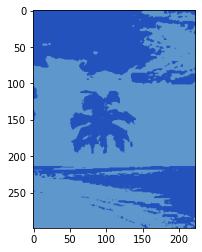

In [108]:
# get the predicted image
predictionImage = prediction.reshape((299,223,3))
# display the predicted image
plt.imshow(predictionImage)

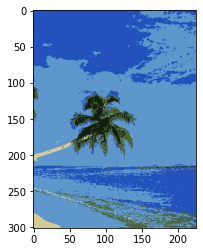

In [109]:
# get expected output test image
expectedtestingOutputImage = skio.imread(fname="expectedtestingOutputImage.jpg")
# display it
plt.imshow(expectedtestingOutputImage)